In [191]:
import requests
import pprint as pp
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

api_key = "08139dcdb3msh3a387961b7326e5p1f355ejsnfcb2a93b9426"

headers = {
	"X-RapidAPI-Host": "wft-geo-db.p.rapidapi.com",
	"X-RapidAPI-Key": api_key
}


In [126]:
def siglas_estados(sigla):
    list_state = []
    url = "https://wft-geo-db.p.rapidapi.com/v1/geo/countries/"+ sigla + "/regions"

    i = 0
    while(i < 3):
        triste = i * 10
        querystring = {"limit":"10", "offset": f"{triste}"}
    
        response = requests.request("GET", url, headers=headers, params=querystring)
        region = response.json()

        z = region["data"]

        for j in z:
            list_state.append(j["isoCode"])
        i += 1
        time.sleep(3)    
    
    return list_state



In [127]:
sigla = "BR"
ms = siglas_estados(sigla)

In [80]:
def cidades(sigla, ms, limit=10):
    lista_cidades = []

    j = 0
    while(j < len(ms)):
        region_code = ms[j]
        url = "https://wft-geo-db.p.rapidapi.com/v1/" + "geo/countries/" + sigla + "/regions/" + region_code  + "/cities"
        querystring = {
            "countryIds": sigla,
            "sort": "-population",
            "limit": limit
            }
        response = requests.request("GET", url, headers=headers, params=querystring)
        paises_pop = response.json()["data"]

        for i in paises_pop:
            lista_cidades.append(
                {
                    "id": i["wikiDataId"],
                    "name": i["name"],
                    "population": i["population"],
                    "state": region_code,
                    "country": sigla,
                    "latitude": i["latitude"],
                    "longitude": i["longitude"]
                }
            )
        j = j + 1
        time.sleep(2)

    return lista_cidades


In [81]:
triste = cidades(sigla, ms)


In [82]:
df = pd.DataFrame(triste)

print(df)

           id                  name  population state country   latitude  \
0     Q171612            Rio Branco      413418    AC      BR  -9.978056   
1     Q941136       Cruzeiro do Sul       82622    AC      BR  -7.630833   
2    Q1754389        Sena Madureira       46511    AC      BR  -9.065833   
3     Q979910              Tarauacá       40024    AC      BR  -8.160833   
4    Q1994833                 Feijó       34884    AC      BR  -8.163889   
..        ...                   ...         ...   ...     ...        ...   
263  Q1783966            Araguatins       36170    TO      BR  -5.650833   
264  Q1801758  Colinas do Tocantins       35851    TO      BR  -8.058889   
265  Q1801179                Guaraí       26165    TO      BR  -8.833889   
266   Q587927        Tocantinópolis       22845    TO      BR  -6.328889   
267  Q1801150            Dianópolis       22424    TO      BR -11.627780   

     longitude  
0   -67.811667  
1   -72.670000  
2   -68.656944  
3   -70.765833  
4 

In [83]:
df.to_csv('cidades.csv')

In [134]:
dft = pd.read_csv('cidades.csv')
dft

,Unnamed: 0.1,Unnamed: 0,id,name,population,state,country,latitude,longitude
0,0,0,Q171612,Rio Branco,413418,AC,BR,-9.978056,-67.811667
1,1,1,Q941136,Cruzeiro do Sul,82622,AC,BR,-7.630833,-72.670000
2,2,2,Q1754389,Sena Madureira,46511,AC,BR,-9.065833,-68.656944
3,3,3,Q979910,Tarauacá,40024,AC,BR,-8.160833,-70.765833
4,4,4,Q1994833,Feijó,34884,AC,BR,-8.163889,-70.353889
...,...,...,...,...,...,...,...,...,...
262,263,263,Q1783966,Araguatins,36170,TO,BR,-5.650833,-48.123889
263,264,264,Q1801758,Colinas do Tocantins,35851,TO,BR,-8.058889,-48.475000
264,265,265,Q1801179,Guaraí,26165,TO,BR,-8.833889,-48.510000
265,266,266,Q587927,Tocantinópolis,22845,TO,BR,-6.328889,-47.415833


In [107]:
dft.drop(dft.loc[dft['name'] == 'Greater Rio de Janeiro'].index, inplace= True)



In [129]:
dft.loc[dft['name'] == 'Greater Rio de Janeiro']

,Unnamed: 0.1,Unnamed: 0,id,name,population,state,country,latitude,longitude


In [109]:
novo_dict = {
"id": "Q178725",
"name": "Niterói",
"population": 515317,
"state": "RJ",
"country": "BR",
"latitude": -22.91715,
"longitude": -43.08391,
}

In [115]:
dft.append({
"id": "Q178725",
"name": "Niterói",
"population": 515317,
"state": "RJ",
"country": "BR",
"latitude": -22.91715,
"longitude": -43.08391,
}, ignore_index= True)

/tmp/ipykernel_31202/1626547438.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dft.append({


,Unnamed: 0,id,name,population,state,country,latitude,longitude
0,0.0,Q171612,Rio Branco,413418,AC,BR,-9.978056,-67.811667
1,1.0,Q941136,Cruzeiro do Sul,82622,AC,BR,-7.630833,-72.670000
2,2.0,Q1754389,Sena Madureira,46511,AC,BR,-9.065833,-68.656944
3,3.0,Q979910,Tarauacá,40024,AC,BR,-8.160833,-70.765833
4,4.0,Q1994833,Feijó,34884,AC,BR,-8.163889,-70.353889
...,...,...,...,...,...,...,...,...
263,264.0,Q1801758,Colinas do Tocantins,35851,TO,BR,-8.058889,-48.475000
264,265.0,Q1801179,Guaraí,26165,TO,BR,-8.833889,-48.510000
265,266.0,Q587927,Tocantinópolis,22845,TO,BR,-6.328889,-47.415833
266,267.0,Q1801150,Dianópolis,22424,TO,BR,-11.627780,-46.820560


In [116]:
dft.loc[dft['name'] == 'Niterói']

,Unnamed: 0,id,name,population,state,country,latitude,longitude
203,203,Q178725,Niterói,515317,RJ,BR,-22.91715,-43.08391


In [132]:
dft.to_csv('cidades.csv', index= False)

In [118]:
dft.loc[dft['state'] == 'RJ']

,Unnamed: 0,id,name,population,state,country,latitude,longitude
199,199,Q8678,Rio de Janeiro,6747815,RJ,BR,-22.908333,-43.196389
200,200,Q83114,São Gonçalo,1091737,RJ,BR,-22.826944,-43.053889
201,201,Q193021,Duque de Caxias,924624,RJ,BR,-22.785560,-43.311670
202,202,Q188897,Nova Iguaçu,823302,RJ,BR,-22.758889,-43.450833
203,203,Q178725,Niterói,515317,RJ,BR,-22.917150,-43.083910
204,204,Q737636,Belford Roxo,513118,RJ,BR,-22.763889,-43.398889
205,205,Q459690,São João de Meriti,472906,RJ,BR,-22.803889,-43.371944
206,206,Q22047120,Campos,387417,RJ,BR,-21.752270,-41.330440
207,207,Q189043,Petrópolis,306678,RJ,BR,-22.505000,-43.178889


In [135]:
dft.groupby('state').sum('population')

,Unnamed: 0.1,Unnamed: 0,population,latitude,longitude
state,,,,,
AC,45,45,725655,-90.166922,-700.790188
AL,145,145,1753016,-97.329480,-363.846864
AM,345,345,2906951,-39.536666,-605.892820
AP,245,245,822167,7.441847,-515.526422
BA,445,445,5176564,-134.371943,-398.531662
CE,545,545,4340446,-48.411111,-391.733611
DF,588,588,3015268,-126.419960,-383.926860
ES,645,645,2639846,-200.084344,-403.930567
GO,825,825,3560126,-167.832777,-487.083890


In [136]:
import plotly_express as px

In [144]:
fig = px.scatter_geo(dft, 'latitude', 'longitude', hover_name='name')

fig

In [154]:
dft2 = dft.groupby('state').max('population')

fig = px.scatter_geo(dft2, 'latitude', 'longitude', hover_name='population')

fig

/tmp/ipykernel_31202/1540547888.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



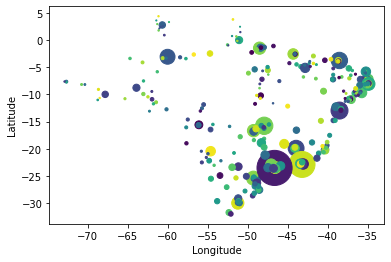

In [196]:
df = pd.read_csv("cidades.csv")
colors = np.random.randint(0, 267, size=267)

i = 0
while(i < df.shape[0]):
    df['population'][i] = df['population'][i]/10000
    i += 1
df.insert(9, 'color', colors, True)


plt.scatter( 'longitude','latitude', c= 'color', s='population', data=df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()